In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf # مكتبة التعلم العميق 
from tensorflow import keras # هذه المكتبة تسمح لنا بإنشاء شبكة عصبونية بسهولة

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
data.drop('customerID',axis=1,inplace=True)

In [ ]:
pd.to_numeric(data['TotalCharges'],errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [ ]:
# إزالة القيم المفقودة في العامود المحدد
data = data[~(pd.to_numeric(data['TotalCharges'],errors='coerce').isnull())]

In [ ]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

<ipython-input-13-bfe10864391b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])


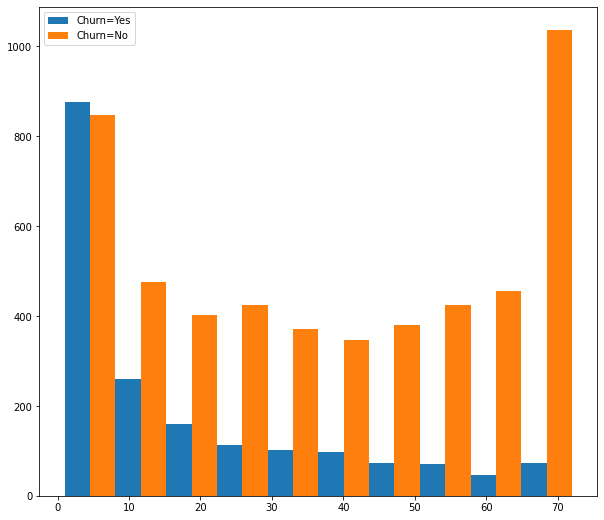

In [ ]:
tenure_churn_no = data[data['Churn']=='No'].tenure
tenure_churn_yes = data[data['Churn']=='Yes'].tenure

plt.figure(figsize=(10,9))
plt.hist([tenure_churn_yes,tenure_churn_no],rwidth=1,label=['Churn=Yes','Churn=No'])
plt.legend()
plt.show()


In [ ]:
def print_unique_col_values(df):    
      for column in df.columns:
        if df[column].dtypes=='object':
            print(f"{column}:{data[column].unique()}")

In [ ]:
print_unique_col_values(data)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [ ]:
# نحول البيانات النصية الى أرقام كون النماذج لا تقبل إلا بالمدخلات الرقمية
data.replace('No phone service','No',inplace=True)
data.replace('No internet service','No',inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [ ]:
x = data.select_dtypes(include='object').columns

In [ ]:
# تغير يتم على كل الأعمدة المحددة 
data[x] = data[x].replace({'Yes':1,'No':0})

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
# بقية الأعمدة النصية
print_unique_col_values(data)

gender:['Female' 'Male']
InternetService:['DSL' 'Fiber optic' 0]
Contract:['Month-to-month' 'One year' 'Two year']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [ ]:
data['gender'].replace({'Female':1,'Male':0},inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
data['gender']

0       1
1       0
2       0
3       0
4       1
       ..
7038    0
7039    1
7040    1
7041    0
7042    0
Name: gender, Length: 7032, dtype: int64

In [ ]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# إنشاء عامود لكل عنصر من عناصر الأعمدة المحددة بقيم 0أو1
data = pd.get_dummies(data=data,columns=['InternetService','Contract','PaymentMethod'])
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,0,1,0,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,...,0,0,1,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [ ]:
data.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_0                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic    

In [ ]:
# تحجيم الأعمدة المحددة
scaler = ['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

data[scaler] = sc.fit_transform(data[scaler])

In [ ]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.323944,1,1,1,0,1,...,0,1,0,0,1,0,0,0,0,1
7039,1,0,1,1,1.000000,1,1,0,1,1,...,0,0,1,0,1,0,0,1,0,0
7040,1,0,1,1,0.140845,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
7041,0,1,1,0,0.042254,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [ ]:
X = data.drop('Churn',axis=1)
y = data['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train,y_test  = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
len(X_train.columns)

26

In [ ]:
# إنشاء شبكة عصبونية بطبقتين
# input_shape عدد الأعمدة التى تدل على السمات
# activation الدالة التى تحسب القيمة داخل العصبون
# لدينا 26 عصبون كمدخل و 20 عصبون مخفي و 1 عصبون كمخرج
# أي الشبكة تتكون من ثلاثة طبقات
model =  keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(1,input_shape=(26,),activation='sigmoid')  
])

# تجميع طبقات الشبكة العصبونية
model.compile(optimizer='adam', # أشهر طريقة للحصول على التجميع الأمثلي
              loss='binary_crossentropy', # دالة الخسارة التى تحسب لنا متوسط الفرق بين القيمة الحقيقة والقيمة المتوقعة بطرق مختلفة
              metrics=['accuracy']) # مصفوفة التقيم

model.fit(X_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5383 - accuracy: 0.7310
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4436 - accuracy: 0.7906
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4311 - accuracy: 0.7934
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4261 - accuracy: 0.7991
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4235 - accuracy: 0.8000
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4210 - accuracy: 0.8014
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4206 - accuracy: 0.8016
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4193 - accuracy: 0.8014
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4181 - accuracy: 0.8036
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4173 - accura

In [ ]:
# تقييم النموذج
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4208 - accuracy: 0.7939


[0.4208022654056549, 0.7938876748085022]

In [ ]:
# التنبؤء بإستخدام النموذج
yp =model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 2ms/step


array([[0.00121468],
       [0.7815761 ],
       [0.15745458],
       [0.65973914],
       [0.5726195 ]], dtype=float32)

In [ ]:
#  هنا العصبون الأخير يعطي قيمة إحتمالية
# إذا كانت القيمة أكبر0.5 فأن إحتمالية أن العميل توقف عن الشراء هي الأقرب للحدوث والعكس صحيح
y_pred = []
for i in yp:
  if i > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [ ]:
# تقرير التصنيف
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1041
           1       0.63      0.51      0.56       366

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.79      1407



In [ ]:
tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[930, 111],
       [179, 187]], dtype=int32)>

In [ ]:
# accuracy & f1_score
round((930+187)/(930+111+179+187),2)

0.79

In [ ]:
# precision 0
round((930)/(930+179),2)

0.84

In [ ]:
# precision 1
round((187)/(111+187),2)

0.63

In [ ]:
# recall 0
round((930)/(930+111),2)l

0.89

In [ ]:
# recall 1
round((187)/(187+179),2)

0.51